In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

**DATA COLLECTION AND PROCESSING**

In [ ]:
#Import File
mobil_dataset = pd.read_csv('/content/car data.csv')

In [ ]:
mobil_dataset.shape

(301, 9)

In [ ]:
mobil_dataset.size

2709

In [ ]:
mobil_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
mobil_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
mobil_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
mobil_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
#Memeriksa distribusi categorical data
print(mobil_dataset.Fuel_Type.value_counts())
print(mobil_dataset.Seller_Type.value_counts())
print(mobil_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


**LABEL ENCODE**


1.   Petrol = 0
2.   Diesel = 1
1.   CNG    = 2



*   Dealer       = 0
*   Individual   = 1


*  Manual    =  0
*  Automatic =  1



In [ ]:
mobil_dataset.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1, 'CNG': 2}, 'Seller_Type':{'Dealer': 0, 'Individual': 1}, 'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

<ipython-input-91-7cef4a21b70b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mobil_dataset.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1, 'CNG': 2}, 'Seller_Type':{'Dealer': 0, 'Individual': 1}, 'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)


In [ ]:
mobil_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**TRAIN TEST SPLIT**

In [ ]:
#Spitting the data
x = mobil_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
y = mobil_dataset['Selling_Price']

In [ ]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [ ]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [ ]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

**MODEL PREDIKSI**

In [ ]:
from sklearn.linear_model import LinearRegression

# Membuat model
LinRegMod = LinearRegression()

# Melatih model dengan data training
LinRegMod.fit(x_train, y_train)


LinearRegression()

 **MODEL EVALUATION**

In [ ]:
#Prediction on Training Data
training_data_prediction = LinRegMod.predict(x_train)

In [ ]:
#R Squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print('R Squared error: ', error_score)

R Squared error:  0.8838169193709796


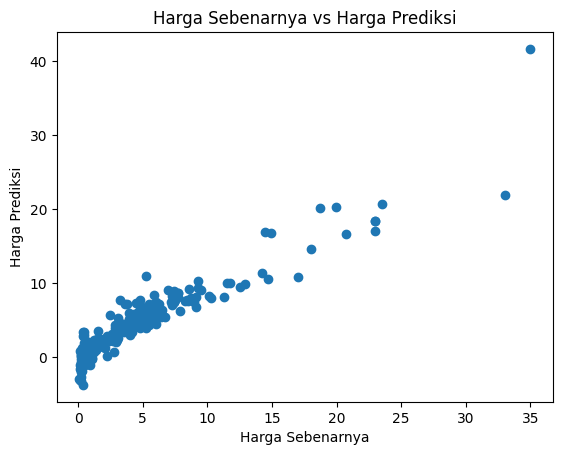

In [ ]:
#Visualize the Actual Prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Harga Sebenarnya')
plt.ylabel('Harga Prediksi')
plt.title('Harga Sebenarnya vs Harga Prediksi')
plt.show()

In [ ]:
test_data_prediction = LinRegMod.predict(x_test)

In [ ]:
error_skor = metrics.r2_score(y_test, test_data_prediction )
print('R Squared error: ', error_skor)

R Squared error:  0.8401532365377697


In [ ]:
#Lasso Regression

In [ ]:
# Membuat model
LasRegMod = Lasso()

# Melatih model dengan data training
LasRegMod.fit(x_train,y_train)


Lasso()

 **MODEL EVALUATION**

In [ ]:
#Prediction on Training Data
training_data_prediction = LasRegMod.predict(x_train)

In [ ]:
#R Squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print('R Squared error: ', error_score)

R Squared error:  0.843587395258283


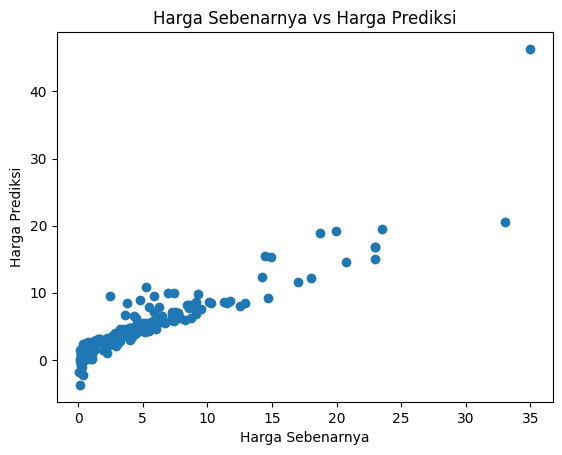

In [ ]:
#Visualize the Actual Prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Harga Sebenarnya')
plt.ylabel('Harga Prediksi')
plt.title('Harga Sebenarnya vs Harga Prediksi')
plt.show()

In [ ]:
testing_data_prediction = LinRegMod.predict(x_test)

In [ ]:
error_score = metrics.r2_score(y_test,testing_data_prediction)
print('R Squared error: ', error_score)

R Squared error:  0.8401532365377697


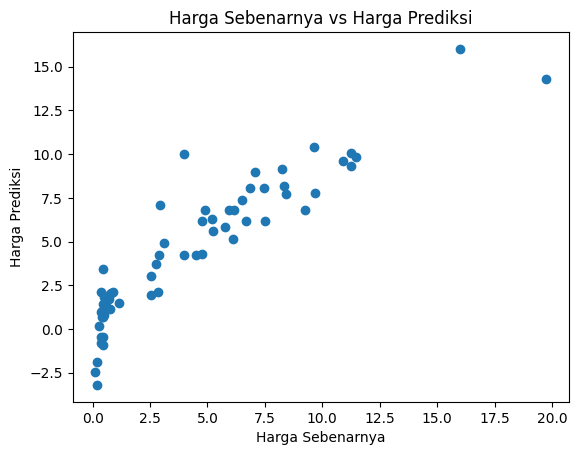

In [ ]:
#Visualize the Actual Prices
plt.scatter(y_test, testing_data_prediction)
plt.xlabel('Harga Sebenarnya')
plt.ylabel('Harga Prediksi')
plt.title('Harga Sebenarnya vs Harga Prediksi')
plt.show()